In [105]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("Steel_industry_data.csv")

In [3]:
pd.reset_option('display.max_columns')
pd.reset_option('display.precision')

pd.set_option('display.max_columns',50)
pd.set_option('display.precision',1)

pd.reset_option('display.max_rows')
pd.reset_option('display.precision')

pd.set_option('display.max_rows',1000)
pd.set_option('display.precision',1)

In [4]:
df.head(200)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.2,3.0,0.0e+00,0.0,73.2,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.0,4.5,0.0e+00,0.0,66.8,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.2,3.3,0.0e+00,0.0,70.3,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.3,3.6,0.0e+00,0.0,68.1,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.8,4.5,0.0e+00,0.0,64.7,100.0,4500,Weekday,Monday,Light_Load
5,01/01/2018 01:30,3.3,3.6,0.0e+00,0.0,67.8,100.0,5400,Weekday,Monday,Light_Load
6,01/01/2018 01:45,3.6,4.1,0.0e+00,0.0,65.6,100.0,6300,Weekday,Monday,Light_Load
7,01/01/2018 02:00,3.6,4.3,0.0e+00,0.0,64.4,100.0,7200,Weekday,Monday,Light_Load
8,01/01/2018 02:15,3.3,3.6,0.0e+00,0.0,66.9,100.0,8100,Weekday,Monday,Light_Load
9,01/01/2018 02:30,3.8,4.7,0.0e+00,0.0,62.5,100.0,9000,Weekday,Monday,Light_Load


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Usage_kWh,35040.0,2.7e+01,3.3e+01,0.0,3.2,4.6,5.1e+01,1.6e+02
Lagging_Current_Reactive.Power_kVarh,35040.0,1.3e+01,1.6e+01,0.0,2.3,5.0,2.3e+01,9.7e+01
Leading_Current_Reactive_Power_kVarh,35040.0,3.9e+00,7.4e+00,0.0,0.0,0.0,2.1e+00,2.8e+01
CO2(tCO2),35040.0,1.2e-02,1.6e-02,0.0,0.0,0.0,2.0e-02,7.0e-02
Lagging_Current_Power_Factor,35040.0,8.1e+01,1.9e+01,0.0,63.3,88.0,9.9e+01,1.0e+02
Leading_Current_Power_Factor,35040.0,8.4e+01,3.0e+01,0.0,99.7,100.0,1.0e+02,1.0e+02
NSM,35040.0,4.3e+04,2.5e+04,0.0,21375.0,42750.0,6.4e+04,8.6e+04


In [7]:
df.head(250)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.2,3.0,0.0e+00,0.0e+00,73.2,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.0,4.5,0.0e+00,0.0e+00,66.8,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.2,3.3,0.0e+00,0.0e+00,70.3,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.3,3.6,0.0e+00,0.0e+00,68.1,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.8,4.5,0.0e+00,0.0e+00,64.7,100.0,4500,Weekday,Monday,Light_Load
5,01/01/2018 01:30,3.3,3.6,0.0e+00,0.0e+00,67.8,100.0,5400,Weekday,Monday,Light_Load
6,01/01/2018 01:45,3.6,4.1,0.0e+00,0.0e+00,65.6,100.0,6300,Weekday,Monday,Light_Load
7,01/01/2018 02:00,3.6,4.3,0.0e+00,0.0e+00,64.4,100.0,7200,Weekday,Monday,Light_Load
8,01/01/2018 02:15,3.3,3.6,0.0e+00,0.0e+00,66.9,100.0,8100,Weekday,Monday,Light_Load
9,01/01/2018 02:30,3.8,4.7,0.0e+00,0.0e+00,62.5,100.0,9000,Weekday,Monday,Light_Load


## EDA

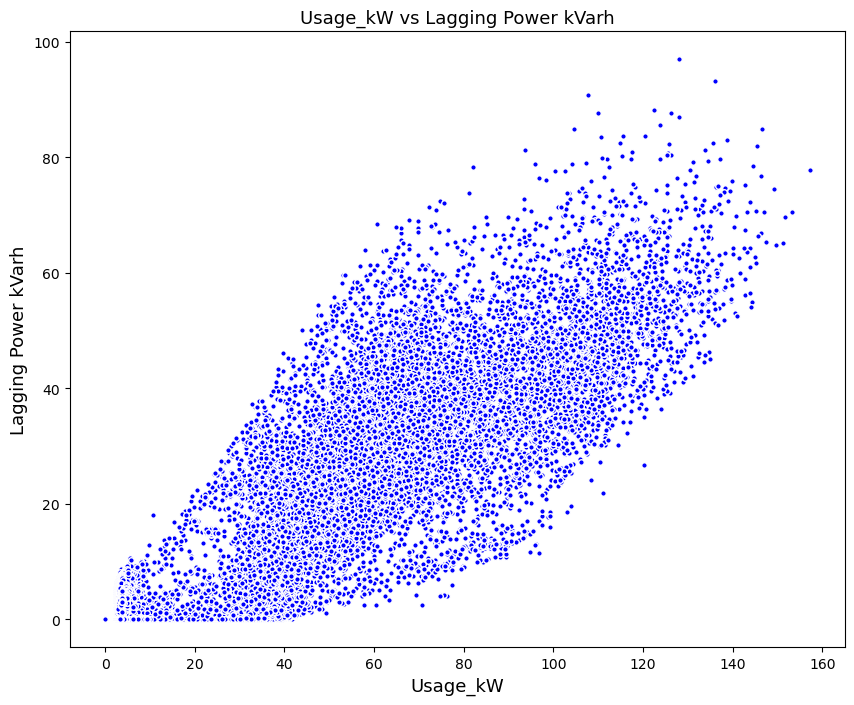

In [177]:
plt.figure(figsize=(10,8))
plt.plot(df['Usage_kWh'], df['Lagging_Current_Reactive.Power_kVarh'], color="blue", linestyle="none", marker="o", markeredgecolor="white",markersize=4)

plt.title("Usage_kW vs Lagging Power kVarh",fontsize=13)
plt.xlabel("Usage_kW",fontsize=13)
plt.ylabel("Lagging Power kVarh",fontsize=13);

plt.yticks(fontsize=10)
plt.xticks(fontsize=10);

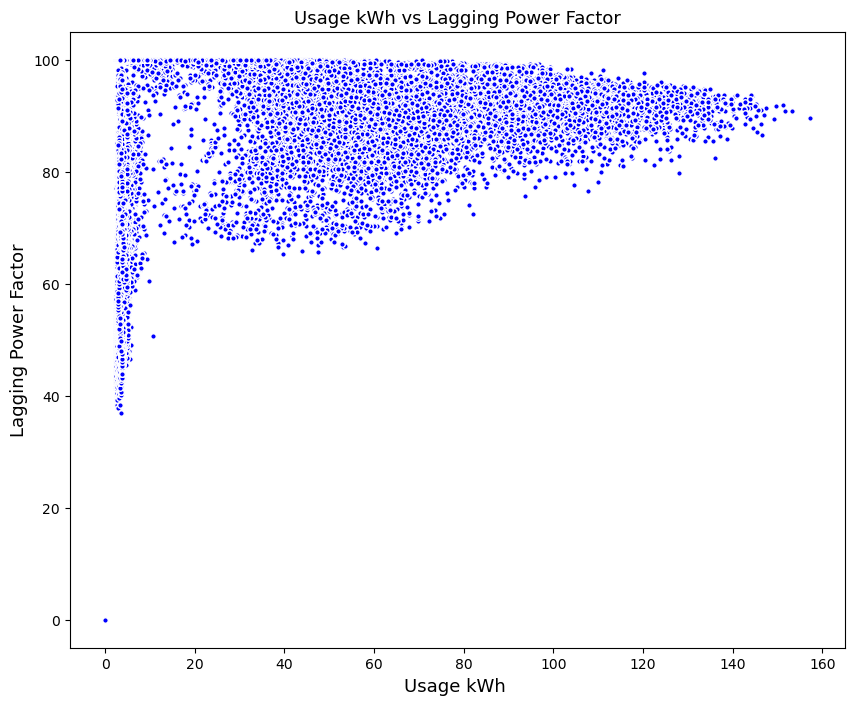

In [176]:
plt.figure(figsize=(10,8))
plt.plot(df['Usage_kWh'], df['Lagging_Current_Power_Factor'], color="blue", linestyle="none", marker="o", markeredgecolor="white",markersize=4)

plt.title("Usage kWh vs Lagging Power Factor",fontsize=13)
plt.xlabel("Usage kWh ",fontsize=13)
plt.ylabel("Lagging Power Factor",fontsize=13);

plt.yticks(fontsize=10)
plt.xticks(fontsize=10);

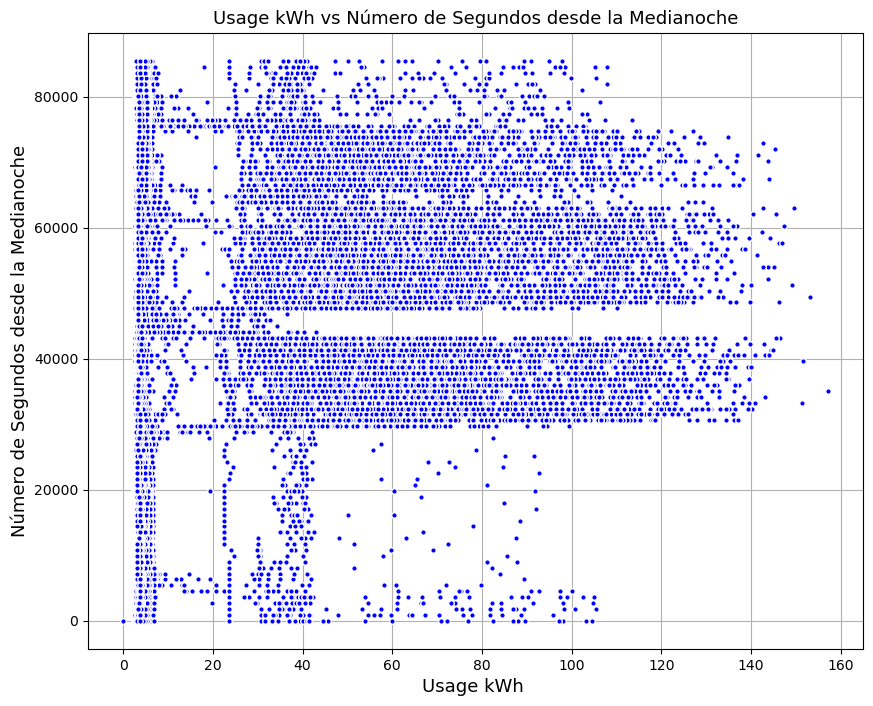

In [175]:
plt.figure(figsize=(10,8))
plt.plot(df['Usage_kWh'], df['NSM'], color="blue", linestyle="none", marker="o", markeredgecolor="white", markersize=4)

plt.title("Usage kWh vs Número de Segundos desde la Medianoche",fontsize=13)
plt.xlabel("Usage kWh ",fontsize=13)
plt.ylabel("Número de Segundos desde la Medianoche",fontsize=13);
plt.grid(True)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10);

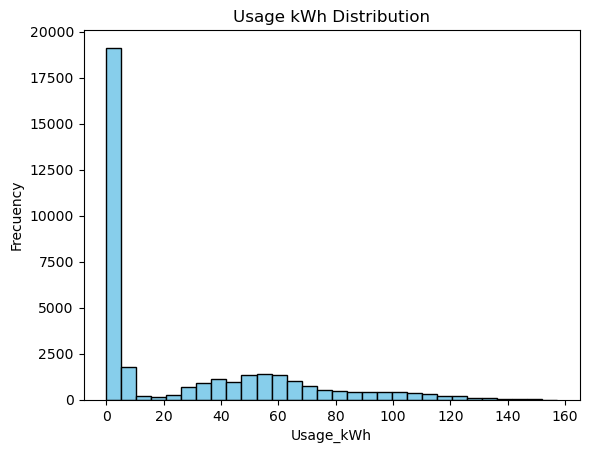

In [11]:
plt.hist(df['Usage_kWh'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Usage_kWh")
plt.ylabel("Frecuency")
plt.title("Usage kWh Distribution");

## Categorical Variables to Numeric

Codificación One-Hot (Get Dummies):

La codificación one-hot es apropiada cuando no hay un orden intrínseco entre las categorías o cuando el orden no es importante para tu análisis.

In [12]:
df = pd.get_dummies(df, columns=['WeekStatus'], prefix='WeekStatus')
df = pd.get_dummies(df, columns=['Load_Type'], prefix='LoadType')

Codificación Ordinal:

La codificación ordinal asume que hay un orden intrínseco en las categorías. En el caso de "Day of week," los días de la semana tienen un orden natural.

In [13]:
unique_days_of_week = df['Day_of_week'].unique()
unique_days_of_week

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [14]:
dayweek= {'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5,'Saturday': 6,'Sunday': 7}

In [15]:
df['Day_of_week'] = df['Day_of_week'].map(dayweek)

## Correlation

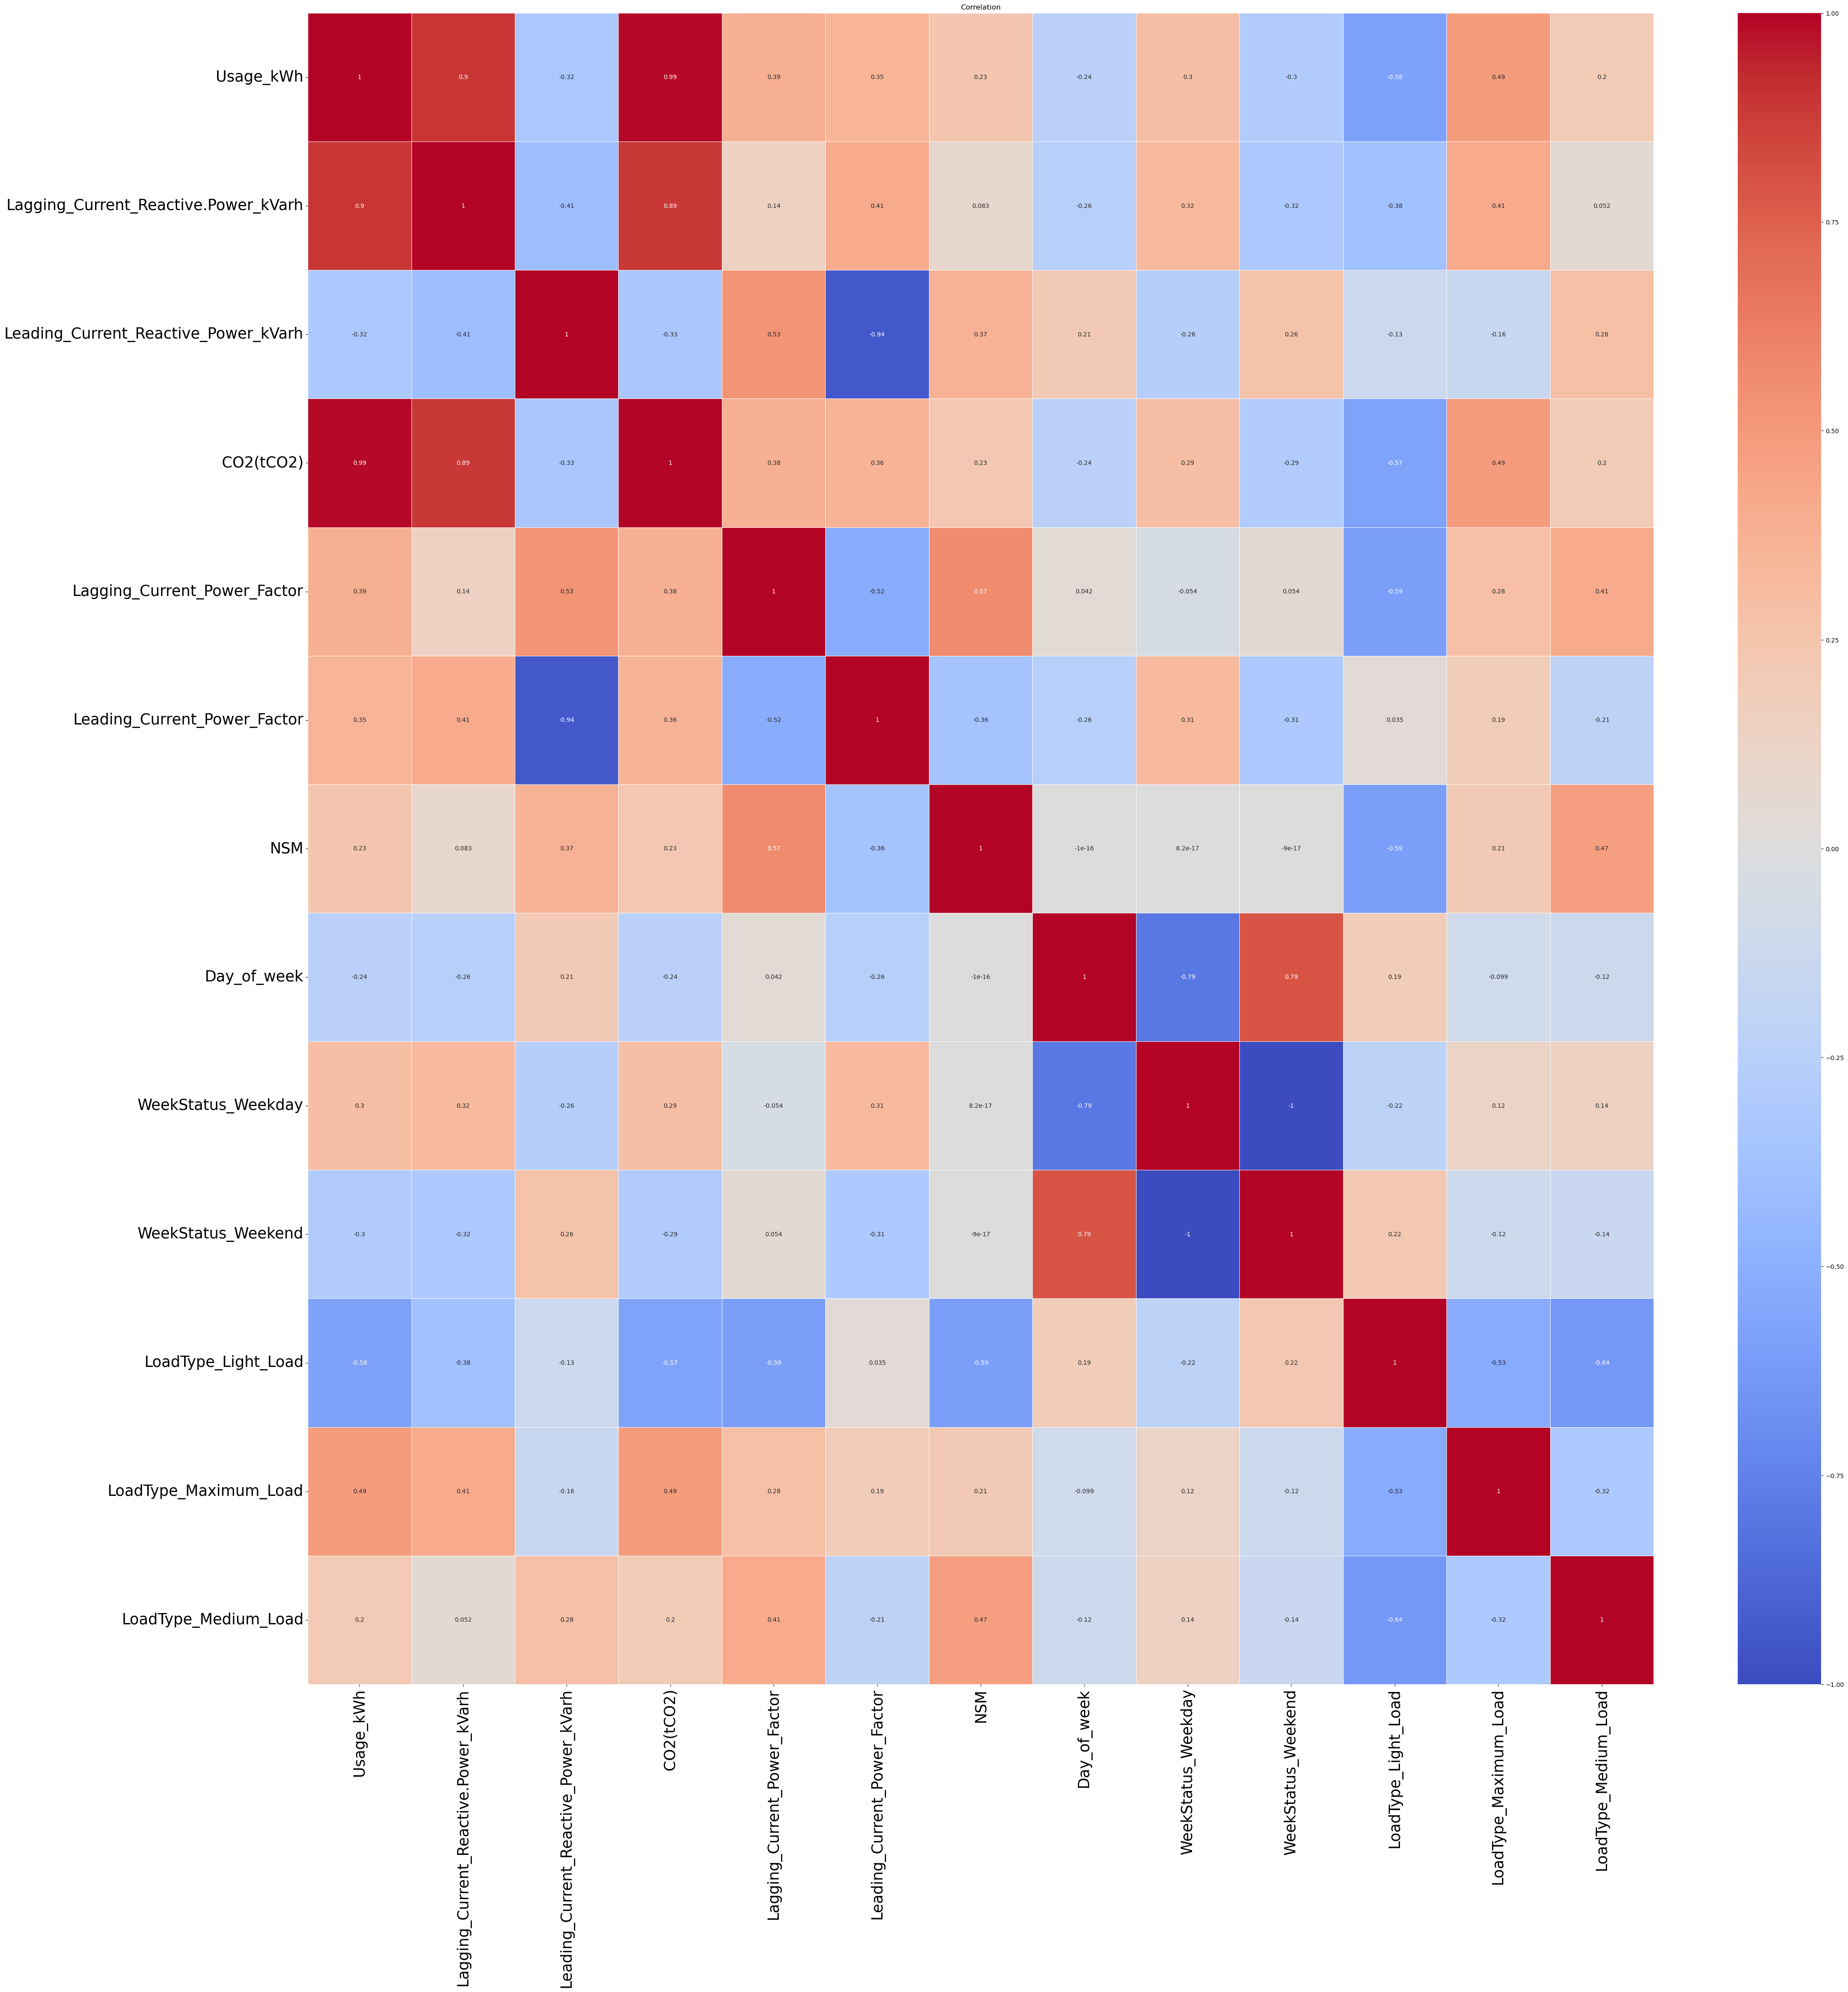

In [16]:
correlation_matrix = df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation')
plt.yticks(rotation=0,fontsize=25)
plt.xticks(fontsize=25);


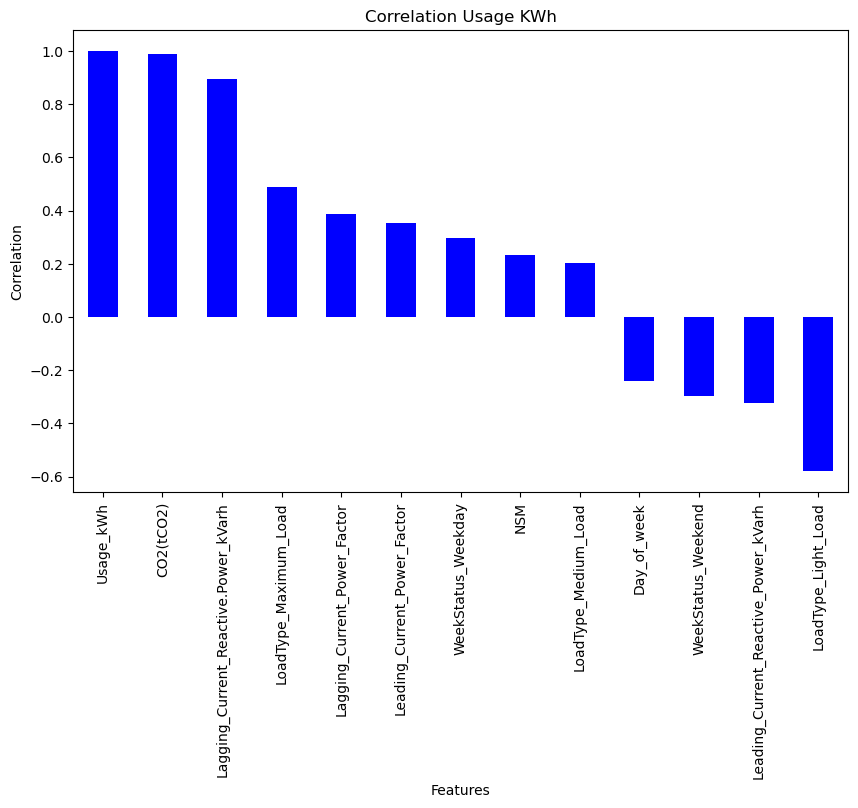

In [17]:
Usage_correlation= correlation_matrix['Usage_kWh'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
Usage_correlation.plot(kind='bar', color='b')
plt.title('Correlation Usage KWh')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

## K-MEANS

## Data Standardization: StandardScaler

In [18]:
scaler=StandardScaler()

In [19]:
df[['Usage_kWh_S','Lagging_Current_Reactive.Power_kVarh_S','Leading_Current_Reactive_Power_kVarh_S','CO2(tCO2)_S',
    'Lagging_Current_Power_Factor_S','Leading_Current_Power_Factor_S','NSM_S','Day_of_week_S','WeekStatus_Weekday_S',
    'WeekStatus_Weekend_S','LoadType_Light_Load_S','LoadType_Maximum_Load_S','LoadType_Medium_Load_S']]= scaler.fit_transform(df[[
    'Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)',
    'Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM','Day_of_week','WeekStatus_Weekday',
    'WeekStatus_Weekend','LoadType_Light_Load','LoadType_Maximum_Load','LoadType_Medium_Load']])

In [20]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,WeekStatus_Weekday,WeekStatus_Weekend,LoadType_Light_Load,LoadType_Maximum_Load,LoadType_Medium_Load,Usage_kWh_S,Lagging_Current_Reactive.Power_kVarh_S,Leading_Current_Reactive_Power_kVarh_S,CO2(tCO2)_S,Lagging_Current_Power_Factor_S,Leading_Current_Power_Factor_S,NSM_S,Day_of_week_S,WeekStatus_Weekday_S,WeekStatus_Weekend_S,LoadType_Light_Load_S,LoadType_Maximum_Load_S,LoadType_Medium_Load_S
0,01/01/2018 00:15,3.2,3.0,0.0e+00,0.0,73.2,100.0,900,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.4,0.5,-1.7,-1.5,0.6,-0.6,1.0,-0.5,-0.6
1,01/01/2018 00:30,4.0,4.5,0.0e+00,0.0,66.8,100.0,1800,1,1,0,1,0,0,-0.7,-0.5,-0.5,-0.7,-0.7,0.5,-1.6,-1.5,0.6,-0.6,1.0,-0.5,-0.6
2,01/01/2018 00:45,3.2,3.3,0.0e+00,0.0,70.3,100.0,2700,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.5,0.5,-1.6,-1.5,0.6,-0.6,1.0,-0.5,-0.6
3,01/01/2018 01:00,3.3,3.6,0.0e+00,0.0,68.1,100.0,3600,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.7,0.5,-1.6,-1.5,0.6,-0.6,1.0,-0.5,-0.6
4,01/01/2018 01:15,3.8,4.5,0.0e+00,0.0,64.7,100.0,4500,1,1,0,1,0,0,-0.7,-0.5,-0.5,-0.7,-0.8,0.5,-1.5,-1.5,0.6,-0.6,1.0,-0.5,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.9,4.9,0.0e+00,0.0,62.1,100.0,82800,1,1,0,1,0,0,-0.7,-0.5,-0.5,-0.7,-1.0,0.5,1.6,-1.5,0.6,-0.6,1.0,-0.5,-0.6
35036,31/12/2018 23:15,3.7,3.7,0.0e+00,0.0,70.7,100.0,83700,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.5,0.5,1.6,-1.5,0.6,-0.6,1.0,-0.5,-0.6
35037,31/12/2018 23:30,3.8,3.2,7.0e-02,0.0,76.6,100.0,84600,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.2,0.5,1.7,-1.5,0.6,-0.6,1.0,-0.5,-0.6
35038,31/12/2018 23:45,3.8,3.1,1.1e-01,0.0,77.7,100.0,85500,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.2,0.5,1.7,-1.5,0.6,-0.6,1.0,-0.5,-0.6


In [21]:
df=df.drop('date', axis=1)

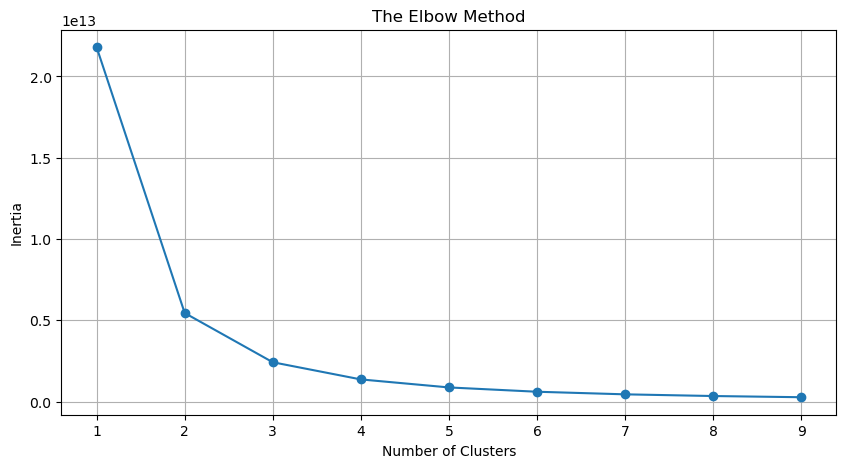

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def optimise_k_means(df, max_k):
    means = []
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        
        means.append(k)
        inertia.append(kmeans.inertia_)

    # Generate the elbow plot
    fig, ax = plt.subplots(figsize=(10, 5))

    plt.plot(means, inertia, 'o-')

    plt.title('The Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    
optimise_k_means(df, max_k=10)

## Applying K-means clustering


In [23]:
# Applying KMeans to the dataset/ Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)

In [24]:
data = df[['Usage_kWh_S', 'Lagging_Current_Reactive.Power_kVarh_S']]

kmeans.fit(data)

KMeans(n_clusters=3, n_init=10, random_state=38)

In [25]:
df['kmeans_3']=kmeans.labels_

In [26]:
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,WeekStatus_Weekday,WeekStatus_Weekend,LoadType_Light_Load,LoadType_Maximum_Load,LoadType_Medium_Load,Usage_kWh_S,Lagging_Current_Reactive.Power_kVarh_S,Leading_Current_Reactive_Power_kVarh_S,CO2(tCO2)_S,Lagging_Current_Power_Factor_S,Leading_Current_Power_Factor_S,NSM_S,Day_of_week_S,WeekStatus_Weekday_S,WeekStatus_Weekend_S,LoadType_Light_Load_S,LoadType_Maximum_Load_S,LoadType_Medium_Load_S,kmeans_3
0,3.2,3.0,0.0e+00,0.0,73.2,100.0,900,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.4,0.5,-1.7,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0
1,4.0,4.5,0.0e+00,0.0,66.8,100.0,1800,1,1,0,1,0,0,-0.7,-0.5,-0.5,-0.7,-0.7,0.5,-1.6,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0
2,3.2,3.3,0.0e+00,0.0,70.3,100.0,2700,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.5,0.5,-1.6,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0
3,3.3,3.6,0.0e+00,0.0,68.1,100.0,3600,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.7,0.5,-1.6,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0
4,3.8,4.5,0.0e+00,0.0,64.7,100.0,4500,1,1,0,1,0,0,-0.7,-0.5,-0.5,-0.7,-0.8,0.5,-1.5,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,3.9,4.9,0.0e+00,0.0,62.1,100.0,82800,1,1,0,1,0,0,-0.7,-0.5,-0.5,-0.7,-1.0,0.5,1.6,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0
35036,3.7,3.7,0.0e+00,0.0,70.7,100.0,83700,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.5,0.5,1.6,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0
35037,3.8,3.2,7.0e-02,0.0,76.6,100.0,84600,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.2,0.5,1.7,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0
35038,3.8,3.1,1.1e-01,0.0,77.7,100.0,85500,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.2,0.5,1.7,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0


## Plotting the Results

In [27]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.62765475, -0.60871934],
       [ 1.99624044,  2.12220746],
       [ 0.84630375,  0.72433091]])

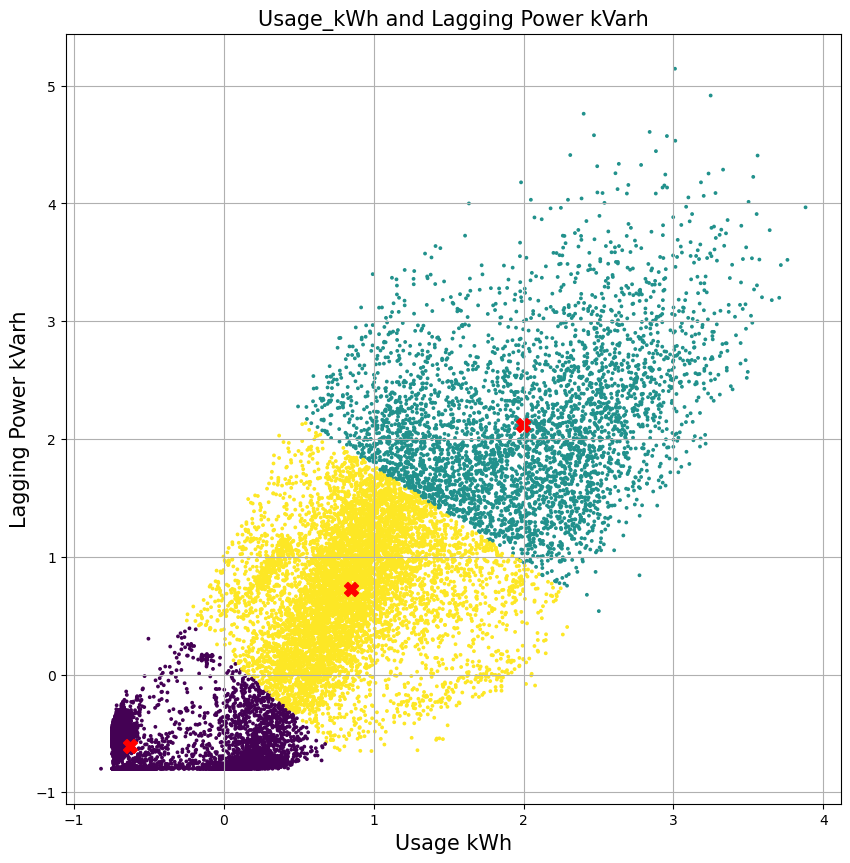

In [171]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(x=df['Usage_kWh_S'], y= df['Lagging_Current_Reactive.Power_kVarh_S'], c=df['kmeans_3'],s=3);
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', s=100, label='Centroids')


plt.title("Usage_kWh and Lagging Power kVarh",fontsize=15)
plt.xlabel('Usage kWh',fontsize=15)
plt.ylabel('Lagging Power kVarh',fontsize=15)

plt.grid(True)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10);

## Creating multiple clusters

In [29]:
for k in range(1, 6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['Usage_kWh_S','Lagging_Current_Reactive.Power_kVarh_S']])
    df[f'KMeans_{k}']=kmeans.labels_

In [30]:
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,WeekStatus_Weekday,WeekStatus_Weekend,LoadType_Light_Load,LoadType_Maximum_Load,LoadType_Medium_Load,Usage_kWh_S,Lagging_Current_Reactive.Power_kVarh_S,Leading_Current_Reactive_Power_kVarh_S,CO2(tCO2)_S,Lagging_Current_Power_Factor_S,Leading_Current_Power_Factor_S,NSM_S,Day_of_week_S,WeekStatus_Weekday_S,WeekStatus_Weekend_S,LoadType_Light_Load_S,LoadType_Maximum_Load_S,LoadType_Medium_Load_S,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
0,3.2,3.0,0.0e+00,0.0,73.2,100.0,900,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.4,0.5,-1.7,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0,0,1,1,0,0
1,4.0,4.5,0.0e+00,0.0,66.8,100.0,1800,1,1,0,1,0,0,-0.7,-0.5,-0.5,-0.7,-0.7,0.5,-1.6,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0,0,1,1,0,0
2,3.2,3.3,0.0e+00,0.0,70.3,100.0,2700,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.5,0.5,-1.6,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0,0,1,1,0,0
3,3.3,3.6,0.0e+00,0.0,68.1,100.0,3600,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.7,0.5,-1.6,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0,0,1,1,0,0
4,3.8,4.5,0.0e+00,0.0,64.7,100.0,4500,1,1,0,1,0,0,-0.7,-0.5,-0.5,-0.7,-0.8,0.5,-1.5,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,3.9,4.9,0.0e+00,0.0,62.1,100.0,82800,1,1,0,1,0,0,-0.7,-0.5,-0.5,-0.7,-1.0,0.5,1.6,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0,0,1,1,0,0
35036,3.7,3.7,0.0e+00,0.0,70.7,100.0,83700,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.5,0.5,1.6,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0,0,1,1,0,0
35037,3.8,3.2,7.0e-02,0.0,76.6,100.0,84600,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.2,0.5,1.7,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0,0,1,1,0,0
35038,3.8,3.1,1.1e-01,0.0,77.7,100.0,85500,1,1,0,1,0,0,-0.7,-0.6,-0.5,-0.7,-0.2,0.5,1.7,-1.5,0.6,-0.6,1.0,-0.5,-0.6,0,0,1,1,0,0


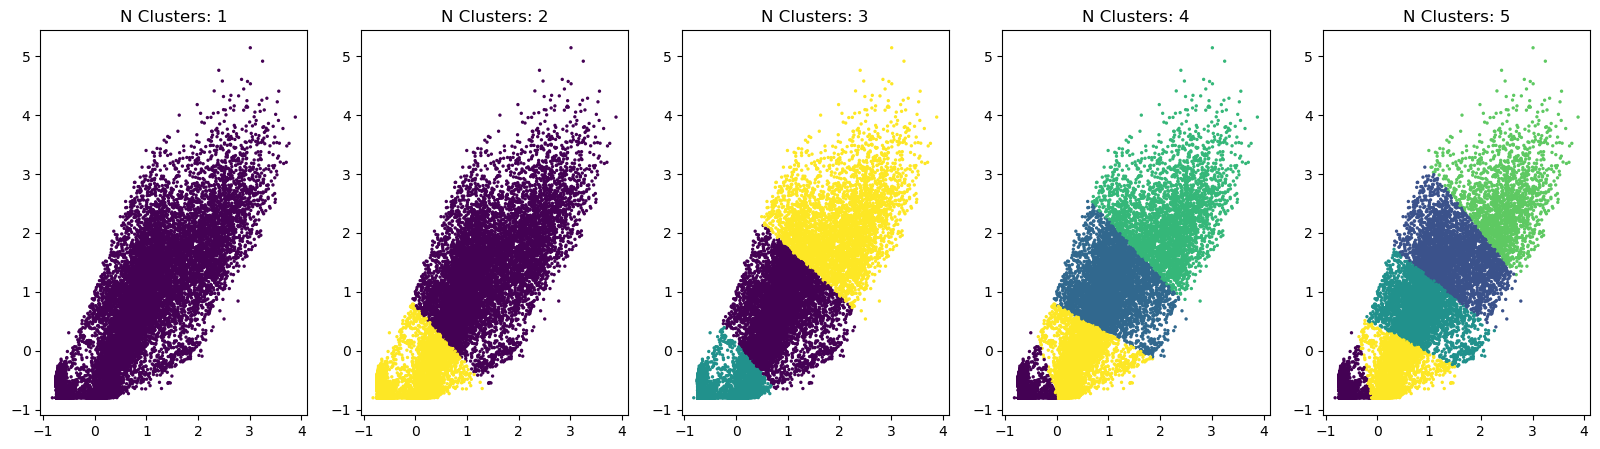

In [167]:
fig, axs=plt.subplots(nrows=1,ncols=5, figsize=(20,5))

for i, ax in enumerate (fig.axes, start=1):
    ax.scatter(x=df['Usage_kWh_S'], y= df['Lagging_Current_Reactive.Power_kVarh_S'], c=df[f'KMeans_{i}'],s=2)
    ax.set_title(f'N Clusters: {i}')

## DBSCAN

In [76]:
X = df[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh']].values

In [77]:
dbscan = DBSCAN(eps=0.5, min_samples=5) 
dbscan.fit(df)

DBSCAN()

In [78]:
df['DBSCAN_label']=dbscan.labels_

In [110]:
cluster_labels = dbscan.labels_
num_noise_points = np.sum(cluster_labels == -1)
num_noise_points

14252

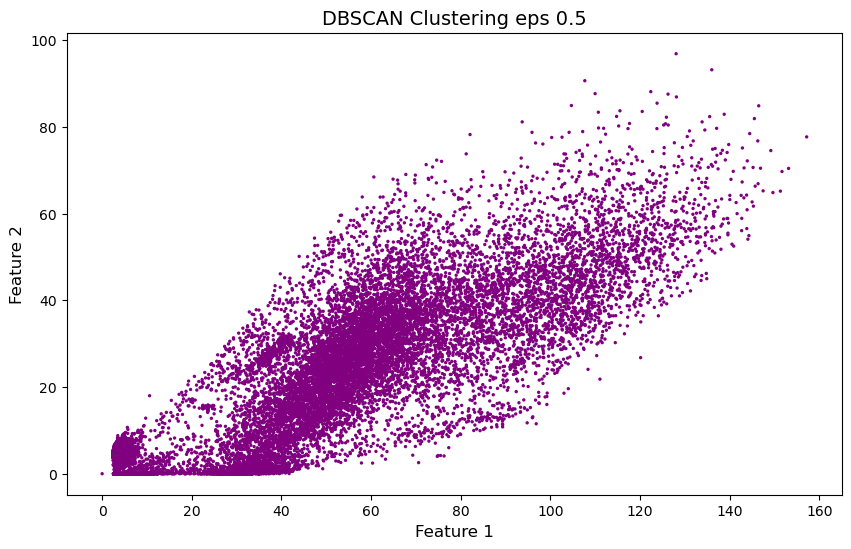

In [166]:
colors = ['purple','red','blue','green']

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=df['DBSCAN_label'], cmap=matplotlib.colors.ListedColormap(colors), s=2)

plt.title('DBSCAN Clustering eps 0.5', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)

plt.show()

Calcular el K-distance graph: Para encontrar un valor adecuado para eps, puedes calcular el K-distance graph utilizando la biblioteca scikit-learn. Esto te dará una idea de la distribución de las distancias entre los puntos de datos. 

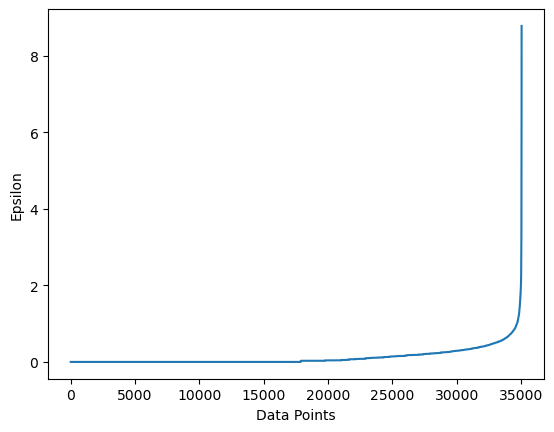

In [113]:
neigh = NearestNeighbors(n_neighbors=2).fit(X)
distances, _ = nbrs.kneighbors(X)

# Ordena las distancias
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Tomar la segunda columna

# Plotea el K-distance graph
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Epsilon')
plt.show()

In [114]:
# Initialise an object neigh by calling a method NearestNeighbors()
neigh = NearestNeighbors(n_neighbors = 2)

# Train the model by calling a method fit()
nbrs = neigh.fit(X)

# Store the distance and indices into distances and indices arrays
distances, indices = nbrs.kneighbors(X)

print(distances, indices)

[[0.   0.  ]
 [0.   0.03]
 [0.   0.  ]
 ...
 [0.   0.03]
 [0.   0.  ]
 [0.   0.  ]] [[ 6645     0]
 [    1 32643]
 [  596     2]
 ...
 [35037  5378]
 [32850  5404]
 [ 4028 34565]]


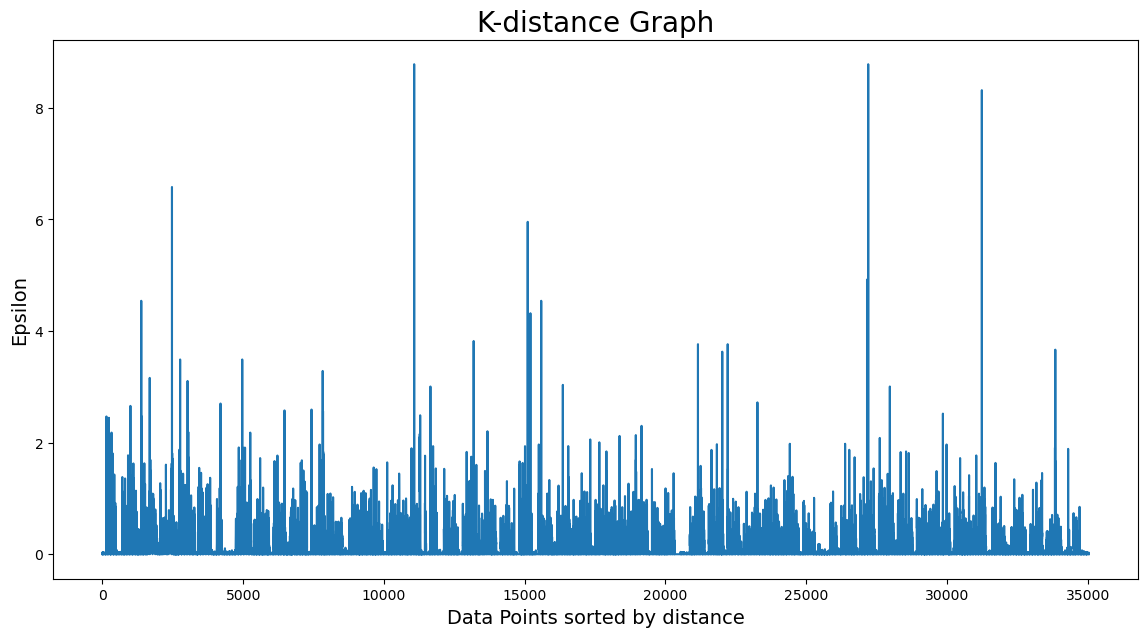

In [115]:
# Plotting K-distance Graph
# distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize = (14, 7))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)
plt.show()

In [156]:
dbscan = DBSCAN(eps=4, min_samples=1) 
dbscan.fit(df)

DBSCAN(eps=4, min_samples=1)

In [157]:
df['DBSCAN_label_2']=dbscan.labels_

In [158]:
cluster_labels = dbscan.labels_
num_noise_points = np.sum(cluster_labels == -1)
num_noise_points

0

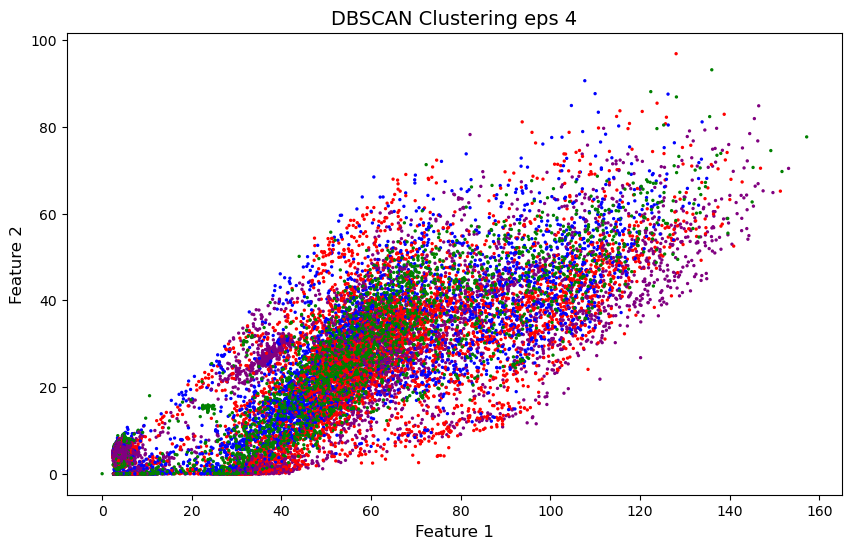

In [165]:
colors = ['purple','red','blue','green']

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=df['DBSCAN_label_2'], cmap=matplotlib.colors.ListedColormap(colors), s=2)

plt.title('DBSCAN Clustering eps 4', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)

plt.show()

In [161]:
# Initialise an object by calling a method DBSCAN along with parameters as eps and min_samples
dbscan_opt = DBSCAN(eps = 4, min_samples = 1)

# Train the model by calling a method fit()
dbscan_opt.fit(X)

DBSCAN(eps=4, min_samples=1)

In [162]:
# Add another column into the dataframe (df)
df['DBSCAN_opt_labels'] = dbscan_opt.labels_

# Display the counts by labels
df['DBSCAN_opt_labels'].value_counts()

0     35027
2         2
8         2
1         1
3         1
4         1
5         1
6         1
7         1
9         1
10        1
11        1
Name: DBSCAN_opt_labels, dtype: int64

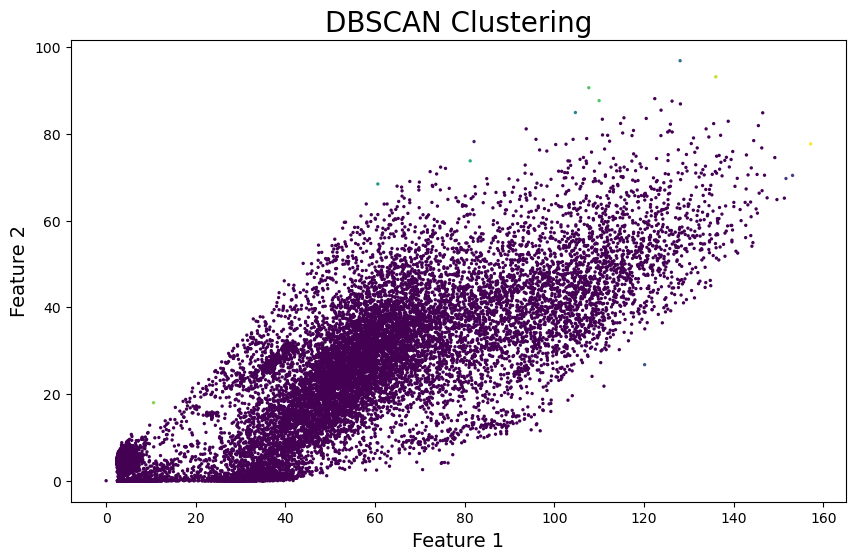

In [164]:
# Plotting the resulting clusters
plt.figure(figsize = (10, 6))
plt.scatter(X[:, 0], X[:, 1], c = df['DBSCAN_opt_labels'], cmap = 'viridis', s = 2)
plt.title('DBSCAN Clustering', fontsize = 20)
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)
plt.show()

## DBSCAN for Usage KWh and NSM